# Задача №1 ⚓:
*Сформируйте систему линейных уравнений для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции numpy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию? 
(Матрица коэффициентов K и свободный вектор L).
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию?*

Ответ: [ 4.363 -1.296  0.193 -0.008]


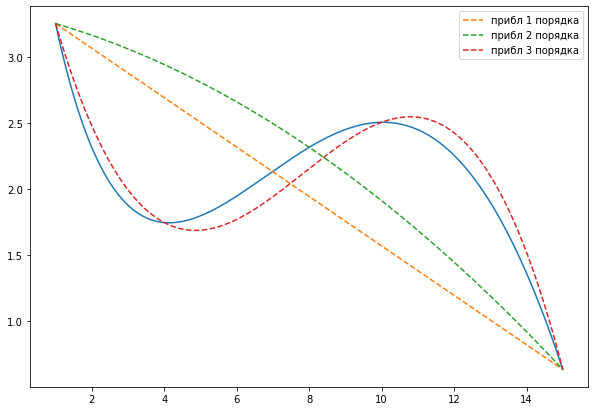

In [ ]:
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np

def f(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

K_1i = [[1, 1], [1, 15]]
L_1i = [f(1), f(15)]
K_2i = [[1, 1, 1], [1, 8, 64], [1, 15, 225]]
L_2i = [f(1), f(8), f(15)]
K_3i = [[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]]
L_3i = [f(1), f(4), f(10), f(15)]

grid = np.linspace(1, 15, 1000)
a_1 = LA.solve(K_1i, L_1i)
a_2 = LA.solve(K_2i, L_2i)
a_3 = LA.solve(K_3i, L_3i)
plt.figure(figsize = (10, 7))
plt.plot(grid, f(grid))
plt.plot(grid, grid*a_1[1] + a_1[0], '--', label = 'прибл 1 порядка')
plt.plot(grid, grid**2*a_2[2] + grid*a_2[1] + a_2[0], '--', label = 'прибл 2 порядка')
plt.plot(grid, grid**3*a_3[3] + grid**2*a_3[2] + grid*a_3[1]  + a_3[0], '--', label = 'прибл 3 порядка')
plt.legend()
print(f'Ответ: {np.around(a_3, decimals = 3)}') 
#вывод 2 сильно ухудшает точность, поэтому выведем для 3

# Задача №2 ⚓:
*Есть два вектора одинаковой длины: x и y. Надо найти количество позиций, для которых элементы в обоих векторах ненулевые. Число позиций, для которых хотя бы в одном из двух векторов x и y есть ненулевой элемент.*


In [ ]:
import numpy as np

def f_xy(x: np.array, y: np.array):
    return np.count_nonzero(x*y), np.count_nonzero(np.absolute(x) + np.absolute(y))

# Задача №3 ⚓:
*В векторе x надо повторить каждый элемент N раз подряд.*

In [ ]:
import numpy as np

def f_xN(x: np.array, N: int):
    return np.repeat(x, N)

print(f_xN(np.array([0, 5, 4]), 4))

[0 0 0 0 5 5 5 5 4 4 4 4]


# Задача №4 ⚓:
*В векторе x надо найти максимальный элемент среди тех, перед которыми стоит ноль.*

In [ ]:
import numpy as np

def f(x):
    ind = np.concatenate([np.array([0]), (np.diff(x) == x[1:]) * 1])
    if len(x[np.nonzero(ind)[0]]):
        return max(x[np.nonzero(ind)[0]])
    else: 
        return 'нет нулевых'
        
print(f(np.array([0, 17, 0, 0, 9, 5, 0, 2, 1])))
print(f(np.array([1, 5, 6, 7, 3, 5, 2, 8, 8])))

17
нет нулевых


# Задача №5 ⚓:
*В векторе x надо заполнить каждый нулевой элемент предыдущим ненулевым значением.*

In [ ]:
import numpy as np

def f(x):
    matrix = np.arange(len(x))
    matrix[x == 0] = 0
    ind_for_x_changed = np.maximum.accumulate(matrix)
    x_changed = x[ind_for_x_changed]
    return x_changed

print(f(np.array([7, 0, 6, 6, 0, 0, 0, -8, 0])))

[ 7  7  6  6  6  6  6 -8 -8]


# Задача №6 ⚓:
*Надо вычислить приближённое значение функции f(x) = ln(1 + x) в точке x0 с помощью разложения в ряд Тейлора N-го порядка в окрестности нуля.*

In [ ]:
import numpy as np

def f(x : np.array, n : int):
    f = np.arange(1, n+1)
    return -(np.tile(-x, (1, n))**f/f).sum(axis = 1)

print(f(np.array([0.1]), 5))    # ln(1.1) = 0.0953101798

[0.09531033]


# Задача №6 ⚓:
*Дана матрица X «объекты-признаки» размера m x n: число строк m — это количество объектов, а число столбцов n — количество признаков. Каждая строка представляет собой описание объекта выборки в виде набора значений его признаков. Каждый же столбец содержит значения определённого признака на всех объектах выборки.*

In [ ]:
import numpy as np

def f(A):
    n = A.shape[0]
    mean_A = np.sum(A, axis = 0)/n
    mA = A - np.tile(mean_A, (n, 1))
    cov_A = np.dot(mA.T, mA)
    return mean_A, cov_A

A1 = np.array([[175, 4], [20, 2], [25, 8]])
print(f(A1)) 

(array([73.33333333,  4.66666667]), array([[15516.66666667,   -86.66666667],
       [  -86.66666667,    18.66666667]]))
